Это аналитический кейс с платформы Kaggle. Необходимо очистить данные и провести анализ на основе данных об IT рынке германии в 2020 году.
Ссылка на датасет: https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from phik import phik_matrix
import plotly.figure_factory as ff
import re
import math

import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Загрузка данных

In [2]:
df = pd.read_csv('IT Salary Survey EU  2020.csv', delimiter=',')

In [3]:
display(df.head(10))
df.info()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",...,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,...,NaN,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,NaN
9,24/11/2020 11:17:50,35.0,Male,Berlin,Software Engineer,15,3,Lead,Java,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [5]:
df.rename(columns = {'Position ':'Position'}, inplace = True)

## Предобработка данных

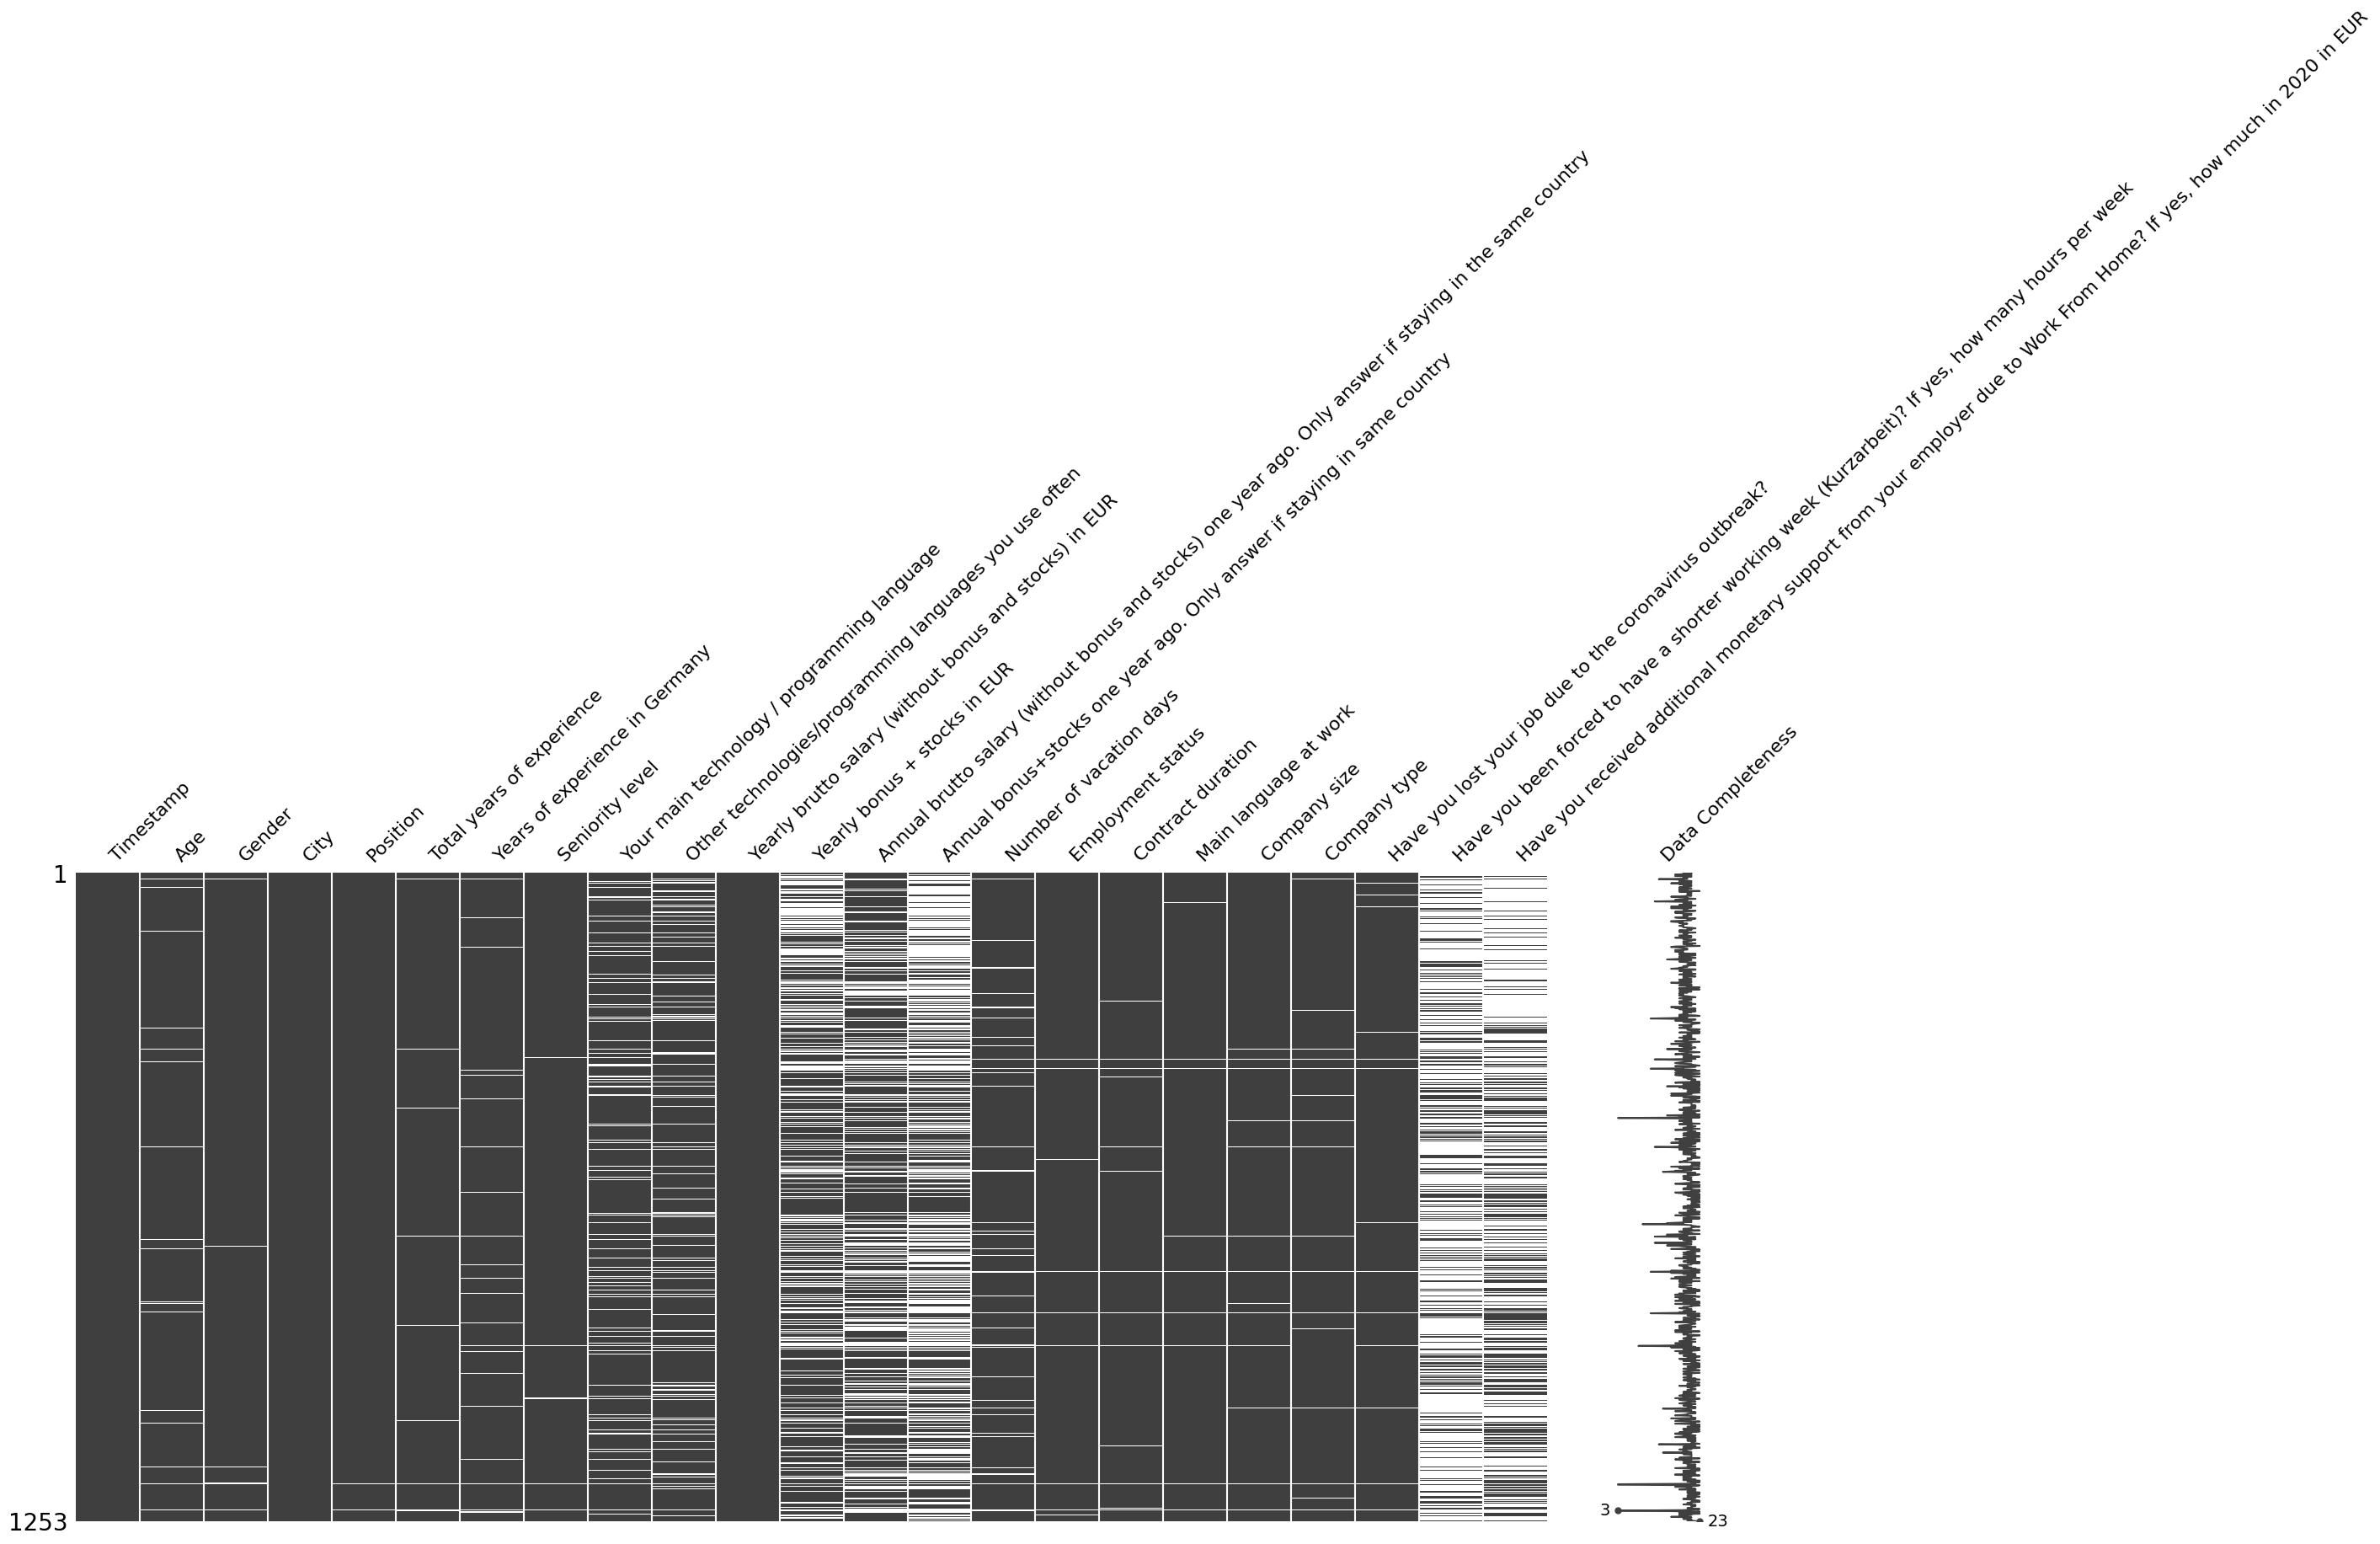

In [6]:
msno.matrix(df, labels=True)
plt.show()

Удалим столбцы в которых почти везде стоят пропуски

In [7]:
df = df.dropna(axis = 0, subset = "Age")
df = df.drop(columns = ['Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'])

In [8]:
df.rename(columns={'Сontract duration':'contact_duration','Position':'position','Yearly brutto salary (without bonus and stocks) in EUR':'salary','Your main technology / programming language':'main_programing_language','Other technologies/programming languages you use often':'other_programming_languages','Have you lost your job due to the coronavirus outbreak?':'lost_due_COVID','Age':'age','Gender':'gender','City':'city','Total years of experience':'experience','Years of experience in Germany':'experience_germany','Seniority level':'seniority_level','Number of vacation days':'vacation','Employment status':'employment_status','Main language at work':'main_language_at_work','Company size':'company_size','Company type':'company_type'},inplace=True)

In [9]:
df.columns

Index(['Timestamp', 'age', 'gender', 'city', 'position', 'experience',
       'experience_germany', 'seniority_level', 'main_programing_language',
       'other_programming_languages', 'salary', 'vacation',
       'employment_status', 'contact_duration', 'main_language_at_work',
       'company_size', 'company_type', 'lost_due_COVID'],
      dtype='object')

In [10]:
df.dropna(subset=['main_programing_language', 'other_programming_languages'], inplace=True)
df['main_programing_language'] = df['main_programing_language'].fillna('Unstated')
df['other_programming_languages'] = df['other_programming_languages'].fillna('Unstated')

Если пропущен основной язык программирования и другие технологии, которые использует человек, то стоит удалить такую запись. Скорее всего больше всего коррелировать с зп будет название вакансии, опыт работы и язык программирования. Но это не значит, что можно снести все записи, где в осноном стеке находится пропуск. В IT есть достаточное количество вакансий не требующих знаний языка программирования, к примеру системный или бизнес аналитик.

In [11]:
df['lost_due_COVID'] = df['lost_due_COVID'].fillna('No')

В этом столбце не много пропусков и скорее всего во время опроса человек пропустил этот вопрос, ведь он не касается его.

In [12]:
df['experience'].value_counts()

experience
10                                                     116
5                                                      109
6                                                       78
8                                                       77
4                                                       67
7                                                       63
12                                                      57
15                                                      53
3                                                       53
9                                                       51
2                                                       48
11                                                      36
14                                                      34
13                                                      32
1                                                       25
20                                                      24
16                                           

In [13]:
df["experience"] = df["experience"].str.replace(",", ".")

df["experience"] = df["experience"].replace({"1 (as QA Engineer) / 11 in total":11, 
                                                                              "15. thereof 8 as CTO" : 15, 
                                                                              "6 (not as a data scientist. but as a lab scientist)" : 6, 
                                                                              "less than year":0 ,
                                                                          "0.8":1})
# На графике пропусков видно, что в местах где есть пропуск с полными годами опыта, есть запись о годах опыта в Германии. Поэтому заполним пропуски в
# этом столбце значнием из годов опыта в Германии.
df["experience"] = df["experience"].fillna(df["experience_germany"])

df["experience"] = df["experience"].astype(float)

In [14]:
df["experience_germany"].value_counts()

experience_germany
1                                                      156
2                                                      151
3                                                      127
5                                                      119
4                                                      106
0                                                       87
6                                                       59
7                                                       29
10                                                      25
1.5                                                     19
9                                                       15
8                                                       12
0.5                                                     10
2.5                                                      9
3.5                                                      9
12                                                       9
15                                   

Тут такая же ситуация, как и в обычном опыте работы

In [15]:
df["experience_germany"] = df["experience_germany"].str.replace(",", ".")
df["experience_germany"] = df["experience_germany"].replace({
    "3 months": 0.25,
    "3 (in Poland)": 0,
    "6 (not as a data scientist. but as a lab scientist)": 6,
    "less than year": 0,
    "⁰": 0,
    "-": 0,
    "0.8":1,
    "<1": 0
})

df["experience_germany"] = df["experience_germany"].astype(float)

df["experience_germany"] = df["experience_germany"].apply(lambda x: 0 if x < 0.5 else (0.5 if x < 1 else x))

df["experience_germany"] = df["experience_germany"].fillna(0)

In [16]:
df.gender = df.gender.fillna('Diverse')

В виду наличия неопределенного пола в исходных данных, заполним этим значением пропуски

In [17]:
df.gender.unique()

array(['Male', 'Female', 'Diverse'], dtype=object)

In [18]:
df.employment_status.unique()

array(['Full-time employee', 'Self-employed (freelancer)',
       'Company Director', nan, 'Founder', 'Part-time employee',
       'working student', 'Working Student',
       'Full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'Intern',
       "full-time, but 32 hours per week (it was my request, I'm a student)",
       'Werkstudent'], dtype=object)

In [19]:
df["employment_status"] = df["employment_status"].replace({
    "Full-time employee": 'Full-time position',
    "full-time, but 32 hours per week (it was my request, I'm a student)": 'working student',
    'Working Student':'working student',
    "Werkstudent": 'working student'
})

In [20]:
df[df['seniority_level'].isna()]

,Timestamp,age,gender,city,position,experience,experience_germany,seniority_level,main_programing_language,other_programming_languages,salary,vacation,employment_status,contact_duration,main_language_at_work,company_size,company_type,lost_due_COVID
68,24/11/2020 11:39:21,48.0,Male,London,Data Engineer,23.0,0.0,NaN,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",110000.0,NaN,Company Director,Temporary contract,English,up to 10,Personal Ltd,Yes
499,25/11/2020 09:05:48,24.0,Male,Cologne,Data Scientist,1.0,1.0,NaN,Python,"SQL, Google Cloud, Kubernetes, Docker",57600.0,27,Full-time position,Unlimited contract,English,11-50,Consulting / Agency,No
525,25/11/2020 10:53:55,37.0,Male,Berlin,Data Analyst,3.0,1.0,NaN,Python,SQL,67000.0,21,Full-time position,Unlimited contract,English,1000+,Product,No
1014,01/12/2020 08:38:27,32.0,Female,Heidelberg,Software Engineer,8.0,0.0,NaN,Typescript,"Javascript / Typescript, .NET, C#, Angular",60000.0,24,Full-time position,Unlimited contract,English,101-1000,Product,Yes
1241,15/01/2021 18:28:54,30.0,Male,Berlin,SRE,10.0,5.0,NaN,Kubernetes,"Go, Kubernetes",68000.0,26,Full-time position,Unlimited contract,English,101-1000,Product,No


Как можно увидить, пропусков в столбце "Seniority level" не так много. Заполним их класическими Junior,Midle и Senior основываясь на годах опыта.

In [21]:
df.columns

Index(['Timestamp', 'age', 'gender', 'city', 'position', 'experience',
       'experience_germany', 'seniority_level', 'main_programing_language',
       'other_programming_languages', 'salary', 'vacation',
       'employment_status', 'contact_duration', 'main_language_at_work',
       'company_size', 'company_type', 'lost_due_COVID'],
      dtype='object')

In [22]:
def fill_seniority_level(row):
    if pd.isna(row['seniority_level']):
        if row['experience'] <= 1:
            return 'Junior'
        elif row['experience'] <= 4:
            return 'Midle'
        else:
            return 'Senior'
    return row['seniority_level']

df['seniority_level'] = df.apply(fill_seniority_level, axis=1)
print(df[df['seniority_level'].isna()])

Empty DataFrame
Columns: [Timestamp, age, gender, city, position, experience, experience_germany, seniority_level, main_programing_language, other_programming_languages, salary, vacation, employment_status, contact_duration, main_language_at_work, company_size, company_type, lost_due_COVID]
Index: []


Написали небольшую функцию и с ее помощью заполнили пропуски.

In [23]:
df['vacation'] = df['vacation'].fillna(20)
df["vacation"] = pd.to_numeric(df["vacation"], errors='coerce')

Заполнил пропуски в количестве дней отпуска минимальным количеством для Германии. И исправил тип данных проигнорировав запись в неограниченое количество отпускных

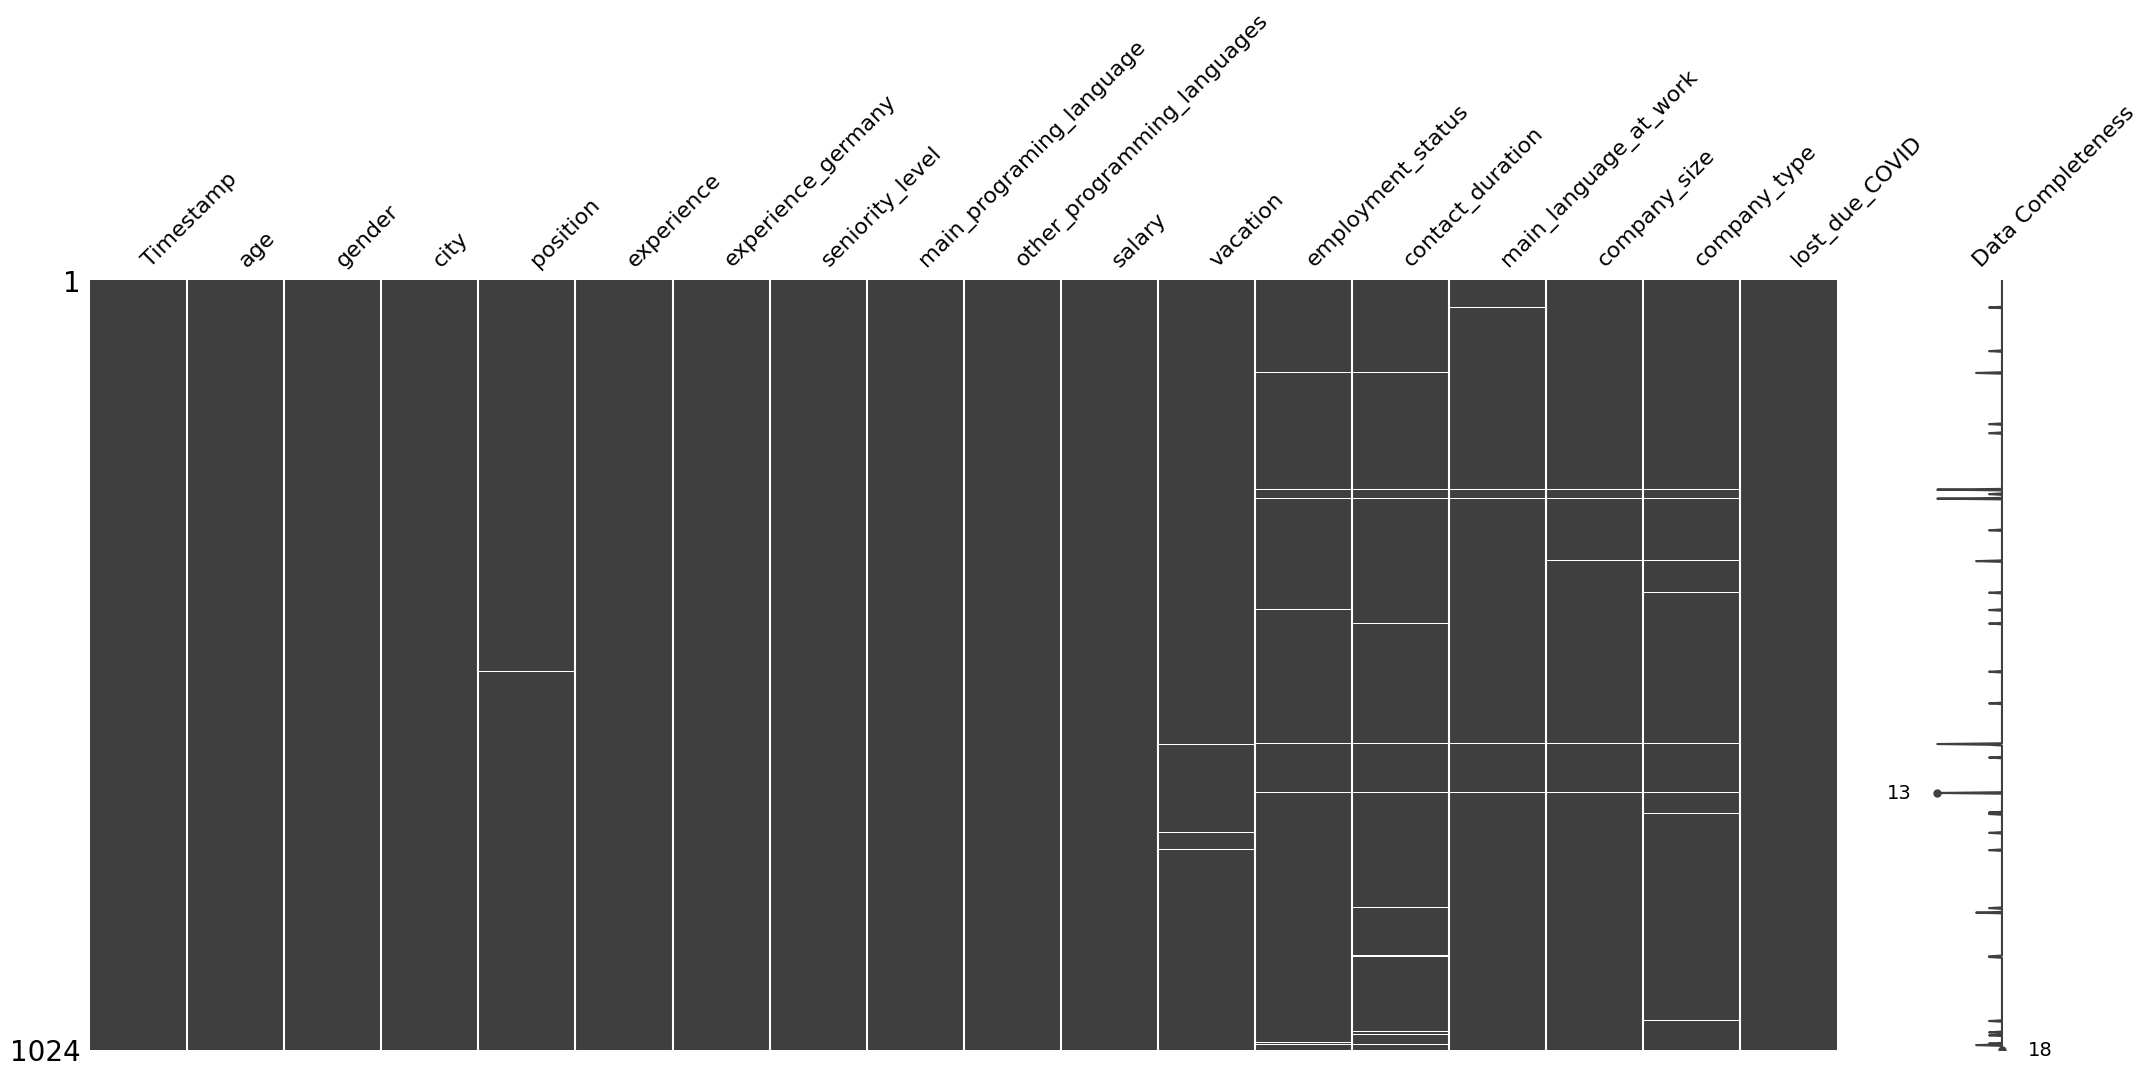

In [24]:
msno.matrix(df, labels=True)
plt.show()

В остальных столбцах нет варианта, которым можно заполнить пропуск, да и пропусков не много, поэтому удалим такие записи.

In [25]:
df = df.dropna()

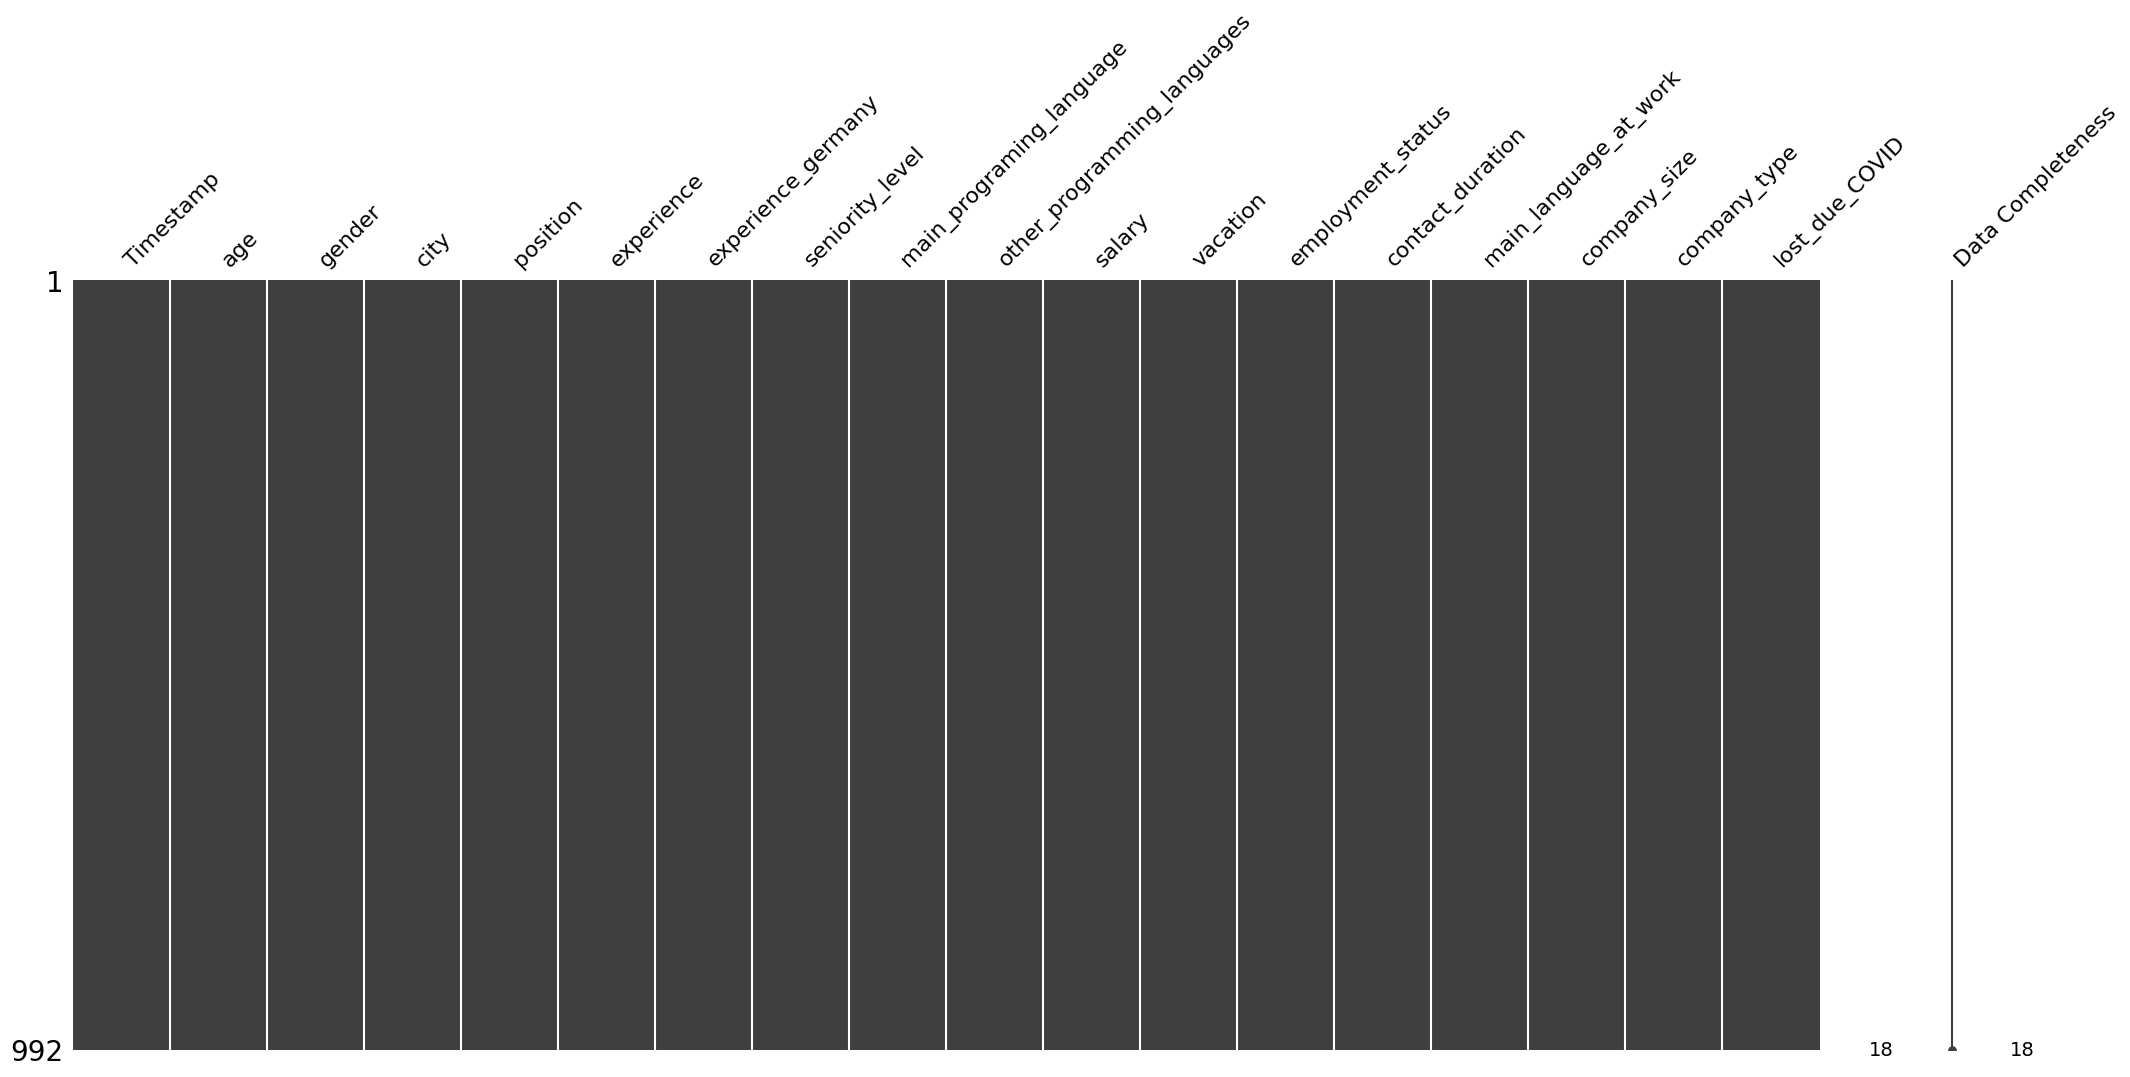

In [26]:
msno.matrix(df, labels=True)
plt.show()

Отлично, мы получили чистый датафрейм и теперь можем переходить к EDA.

## Исследовательский анализ данных

In [27]:
df.describe()

,age,experience,experience_germany,salary,vacation
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,32.470766,8.854335,3.663911,71875.434607,27.763609
std,5.615600,5.393235,3.690322,33773.164893,4.181649
min,20.000000,0.000000,0.000000,10001.000000,0.000000
25%,29.000000,5.000000,1.000000,60000.000000,26.000000
50%,32.000000,8.000000,3.000000,70000.000000,28.000000
75%,35.000000,12.000000,5.000000,80000.000000,30.000000
max,66.000000,40.000000,30.000000,850000.000000,60.000000


В среднем специалисту 32 года, он отработал почти 9 лет в IT, из которых почти 4 в Германии.До вычета налогов получает 71875 евро в год и отдыхает по 28 дней в году.

In [28]:
df.head()

,Timestamp,age,gender,city,position,experience,experience_germany,seniority_level,main_programing_language,other_programming_languages,salary,vacation,employment_status,contact_duration,main_language_at_work,company_size,company_type,lost_due_COVID
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time position,Unlimited contract,English,51-100,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,Full-time position,Unlimited contract,English,101-1000,Product,No
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30.0,Full-time position,Unlimited contract,English,11-50,Startup,No
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5.0,1.0,Senior,Typescript,Javascript / Typescript,65000.0,27.0,Full-time position,Unlimited contract,English,1000+,Product,No


In [29]:
def plotbar(df,ind,val,func,name,x,y):
    data=df.pivot_table(index=ind,values=val,aggfunc=func)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotbar_sort(df, ind, val, func, name, x, y):
    data = df.pivot_table(index=ind, values=val, aggfunc=func).sort_values(by=val, ascending=True)
    data.plot.bar(figsize=(20, 10))
    plt.title(name)
    plt.xlabel(x)
    plt.xticks(rotation=90, fontsize=12.5)
    plt.ylabel(y)
    plt.show()

def pie(df, ind, title):
    counts = df[ind].value_counts()
    labels = counts.index
    total = counts.sum()
    
    new_counts = []
    new_labels = []
    other_count = 0

    for count, label in zip(counts, labels):
        percent = (count / total) * 100
        if percent < 1:
            other_count += count
        else:
            new_counts.append(count)
            new_labels.append(label)

    if other_count > 0:
        new_counts.append(other_count)
        new_labels.append('Other')

    plt.figure(figsize=(10, 8))
    plt.pie(new_counts, labels=new_labels, autopct='%1.1f%%', startangle=140)
    plt.title(title, y=1.05)
    plt.show()

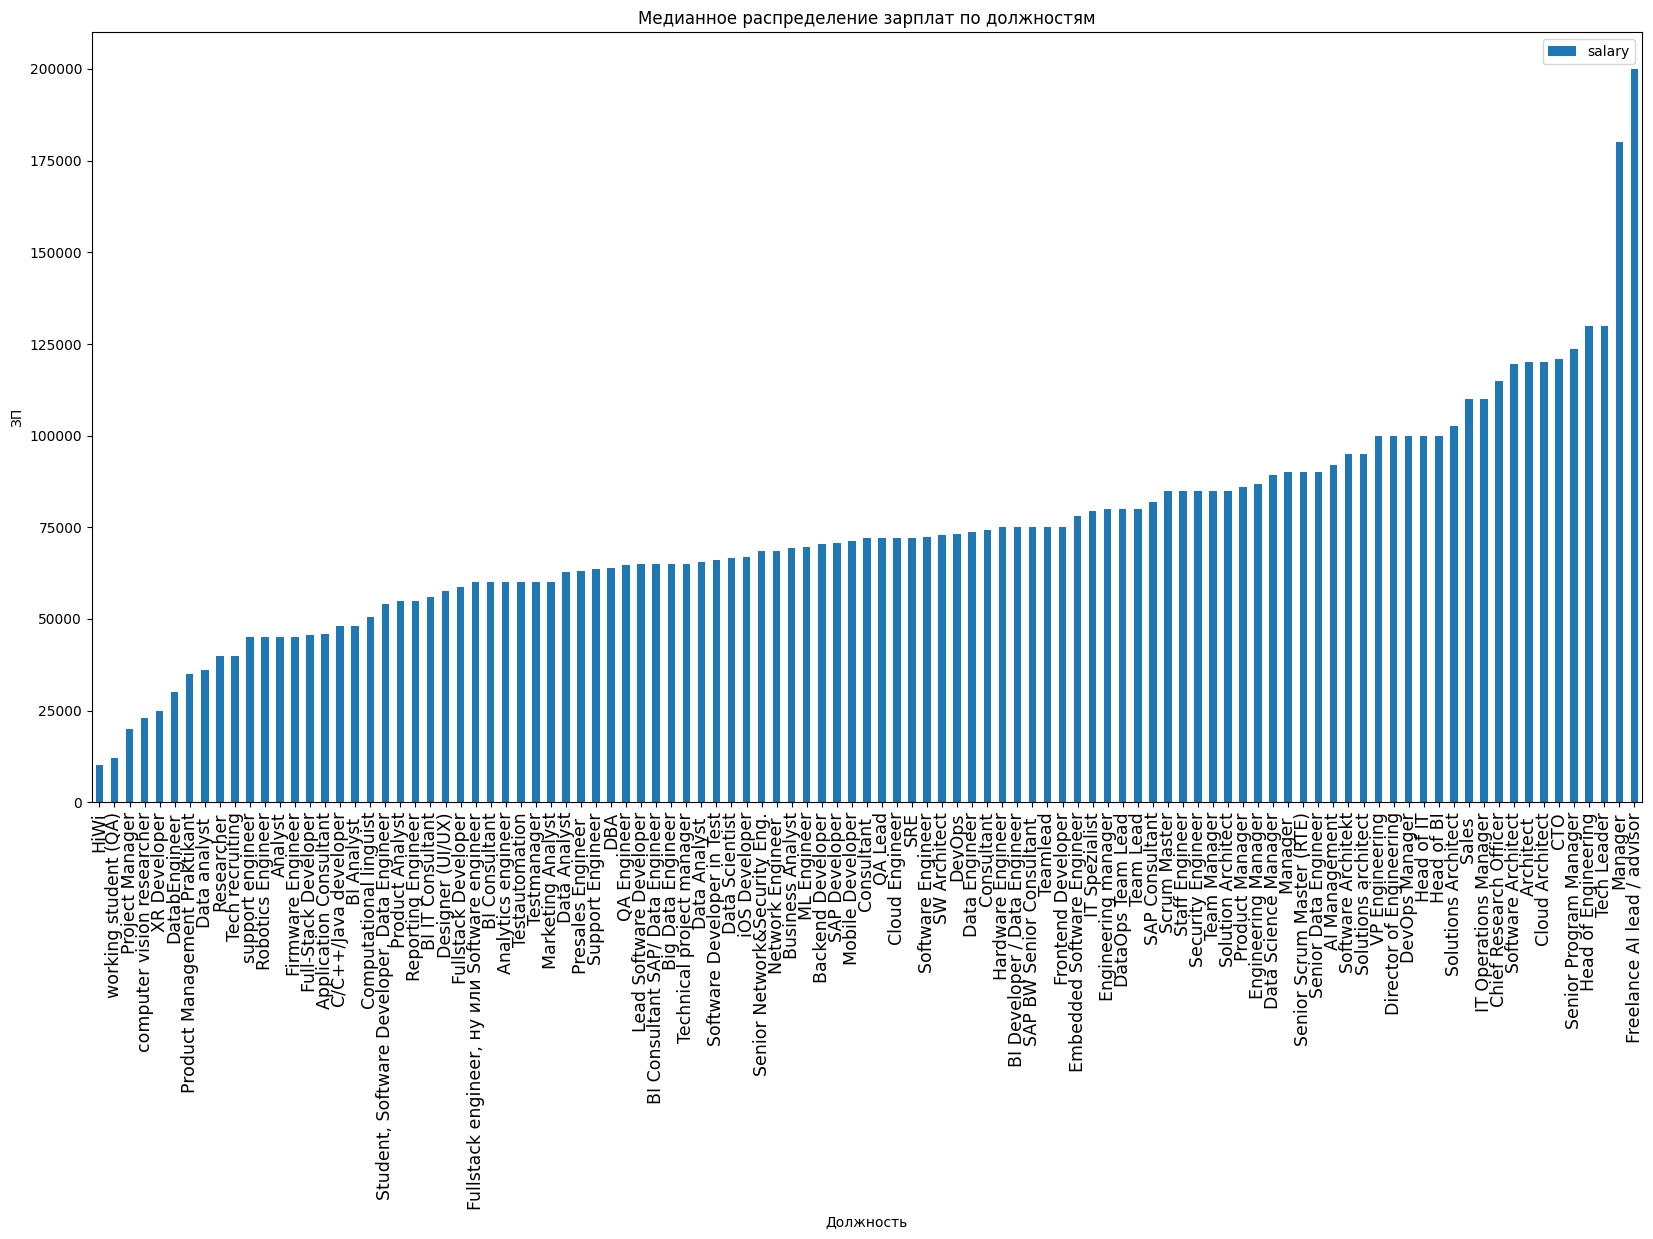

In [30]:
plotbar_sort(df, 'position', 'salary', 'mean', 'Медианное распределение зарплат по должностям', 'Должность', 'ЗП')

На общем фоне Freelance AI lead/advisor очень сильно выбивается с его огромной зп, но в остально большинство получает плюс минус одинаково.

In [31]:
df['position'].value_counts().sort_values(ascending=False)[:5]

position
Software Engineer     347
Backend Developer     148
Data Scientist         94
Frontend Developer     74
Mobile Developer       50
Name: count, dtype: int64

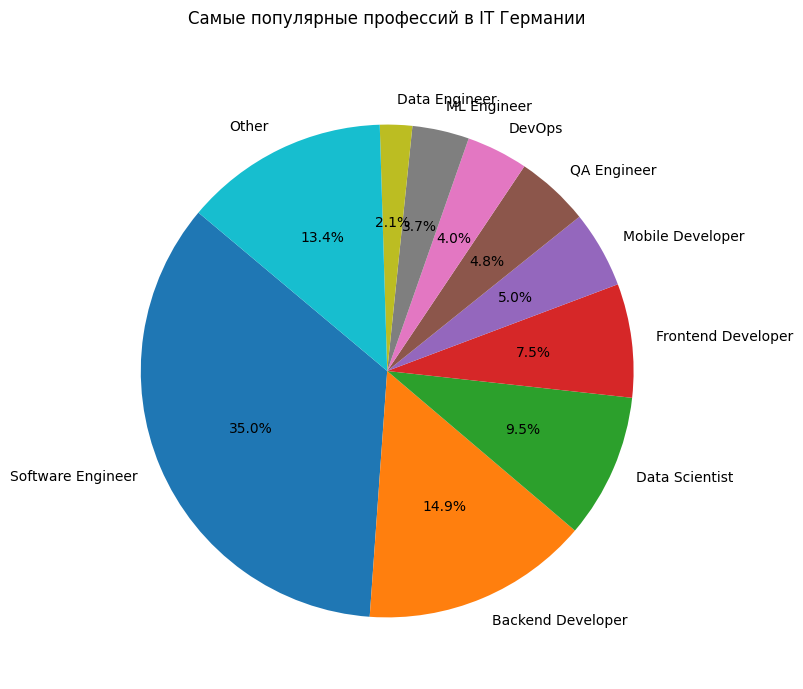

In [32]:
pie(df, 'position', 'Самые популярные профессий в IT Германии')

Скорее всего примерно похожее распределние можно увидеть по всему миру

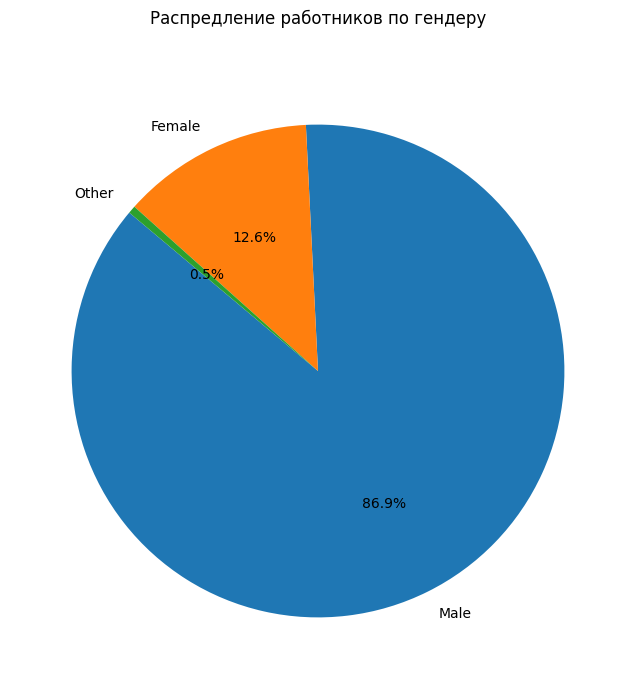

In [33]:
pie(df, 'gender', 'Распредление работников по гендеру')

Большая часть IT специалистов-мужчины

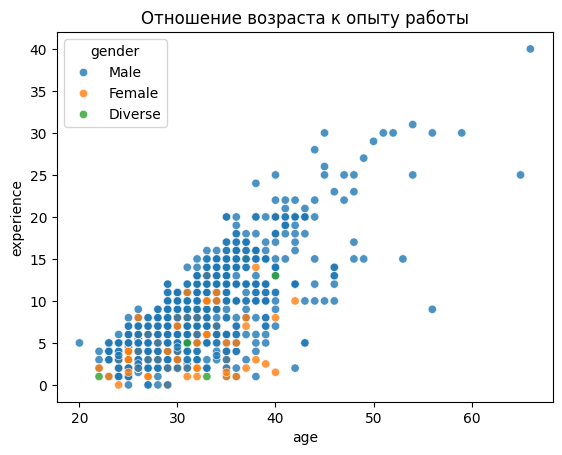

In [34]:
sns.scatterplot(data=df, x="age", y="experience", hue='gender', alpha=0.8)

plt.title("Отношение возраста к опыту работы")
plt.show()

Основная масса работников в возрасте от 25 до 40 лет

In [35]:
df['seniority_level'].value_counts().sort_values(ascending=False)[:5]

seniority_level
Senior    470
Middle    280
Lead      132
Junior     63
Head       31
Name: count, dtype: int64

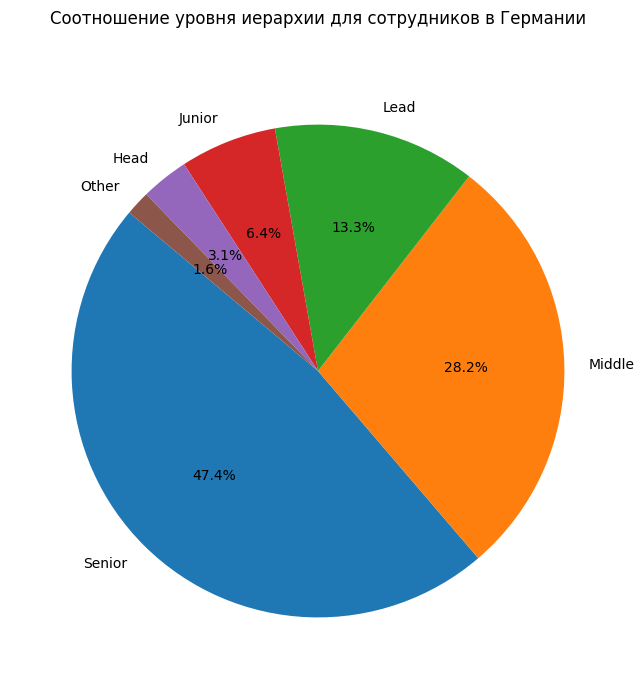

In [36]:
pie(df, 'seniority_level', 'Соотношение уровня иерархии для сотрудников в Германии')

Преймушественно в Германии работают специалисты с большим опытом, а джунов совсем мало на их фоне

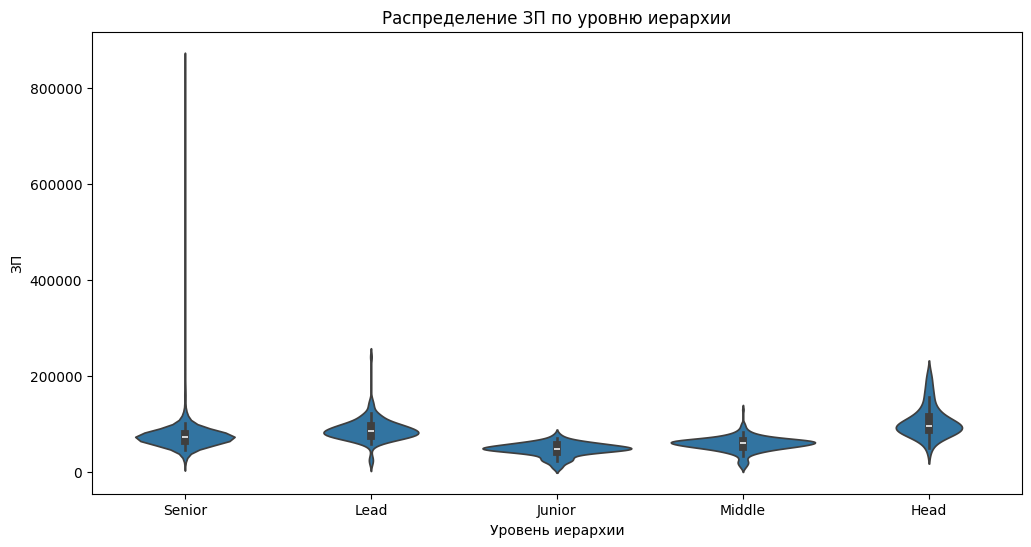

In [37]:
df_top = df[df['seniority_level'].isin(['Senior', 'Middle', 'Lead', 'Junior', 'Head'])]

plt.figure(figsize=(12, 6))

sns.violinplot(x='seniority_level', y='salary', data=df_top)
plt.xlabel('Уровень иерархии')
plt.ylabel('ЗП')
plt.title('Распределение ЗП по уровню иерархии')

plt.show()

**Senior:**

- Диапазон зарплат широк и имеет большие разбросы.
- Есть несколько выбросов (зарплаты значительно выше основной массы), что может говорить о высокооплачиваемых позициях внутри категории Senior.

**Lead:**

- Диапазон зарплат немного шире, чем у Junior и Middle, но уже, чем у Senior.
- Имеются выбросы, но они не так сильно выделяются, как у Senior.

**Junior:**

- Более узкий диапазон зарплат, что свидетельствует о меньших различиях в оплате труда на начальных позициях.
- Распределение более сконцентрировано вокруг средней зарплаты.

**Middle:**

- Диапазон зарплат и распределение похожи на Junior, но немного выше по значению зарплат.
- Тоже сконцентрировано вокруг средней зарплаты.

**Head:**

- Диапазон зарплат схож с Lead и Middle, но немного выше.
- Имеются небольшие выбросы, но в целом распределение более сконцентрировано.


In [38]:
df.columns

Index(['Timestamp', 'age', 'gender', 'city', 'position', 'experience',
       'experience_germany', 'seniority_level', 'main_programing_language',
       'other_programming_languages', 'salary', 'vacation',
       'employment_status', 'contact_duration', 'main_language_at_work',
       'company_size', 'company_type', 'lost_due_COVID'],
      dtype='object')

In [39]:
df['main_programing_language']=df['main_programing_language'].str.capitalize()
df['main_programing_language'].unique()

array(['Typescript', 'Javascript / typescript', 'C# .net',
       'Aws, gcp, python,k8s', 'Php', 'Aws hadoop postgre typescript',
       'Ruby', 'Kotlin', 'Nodejs', 'Javascript', 'Java', 'Ios',
       'Kubernetes', 'Sql', 'Go', 'Python', 'Go/python', 'React', 'С#',
       'Ruby on rails', '.net', 'C#', 'Google cloud platform', 'Js',
       'Android', 'Javascript ', 'Scala', 'C#, .net core', 'Vhdl',
       'Power bi', 'Php ', 'Swift', 'Ml', 'C++', 'Scala, react.js',
       'Ml/python', 'Javascript/typescript', 'Azure, sap', 'Frontend',
       'Java, javascript', 'Yaml', 'Python ', '-', 'Agile', 'C',
       'Typescript, javascript', 'Pegasystems platform ',
       'C++, java, embedded c', 'Cloud', 'Java, angular, aws',
       'Swift, objective-c', 'Golang', 'Devops', 'Node.js', 'R', 'Bash',
       'Nothing', 'Qlik bi tool, sql', 'Blockchain', 'Angular',
       'Autonomous driving', 'Java, terraform', 'Pascal, vb.net, c#',
       'Oracle', 'Angular, react', 'Elixir', 'Nodejs, typescript, 

Для построения качественного графика с отображением популярности языков, избавимся от дубликатов

In [40]:
def normalize(s):
    s = s.lower().strip()
    s = re.sub(r'\s+', ' ', s)  # Заменить несколько пробелов на один
    s = re.sub(r'[^\w\s,]', '', s)  # Удалить пунктуацию, кроме запятых
    s = s.replace(',', ' ').replace('/', ' ').replace(' ', '')  # Заменить / и пробелы
    return s

df['main_programing_language'] = df['main_programing_language'].apply(normalize)

df_count = df['main_programing_language'].value_counts().reset_index()
df_count.columns = ['Technology', 'Count']

df_top10 = df_count.head(10)

df_top10

,Technology,Count
0,python,194
1,java,166
2,c,75
3,javascript,65
4,php,63
5,scala,25
6,go,25
7,typescript,24
8,kotlin,24
9,swift,22


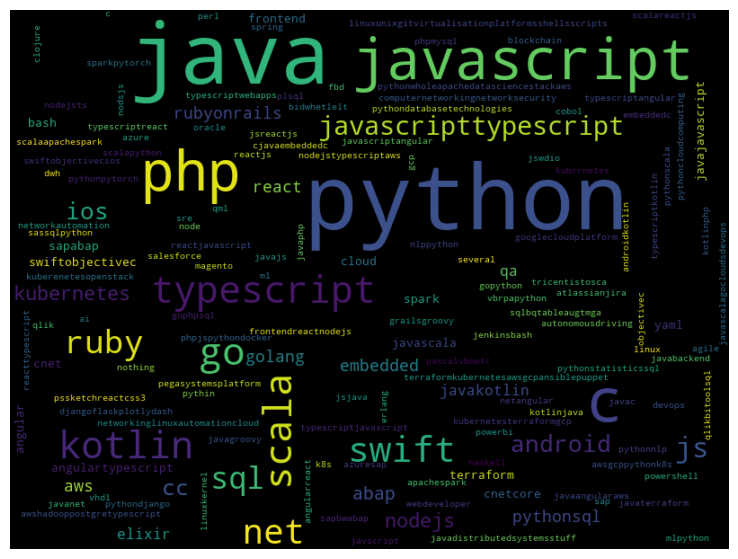

In [41]:
text = " ".join(txt for txt in df['main_programing_language'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Вполне ожидаемо, что python, java, с и js выделяются больше чем остальные

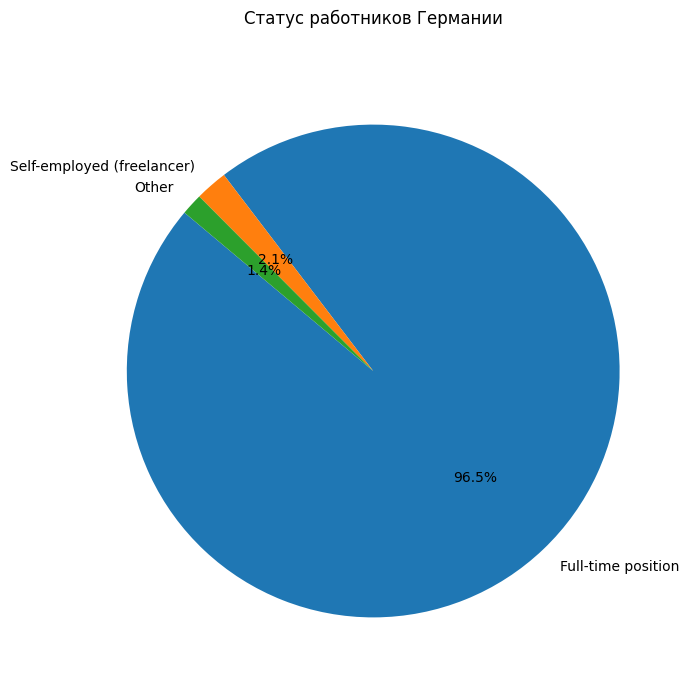

In [42]:
pie(df, 'employment_status', 'Статус работников Германии')

Почти обсолютное большинство работает full-time

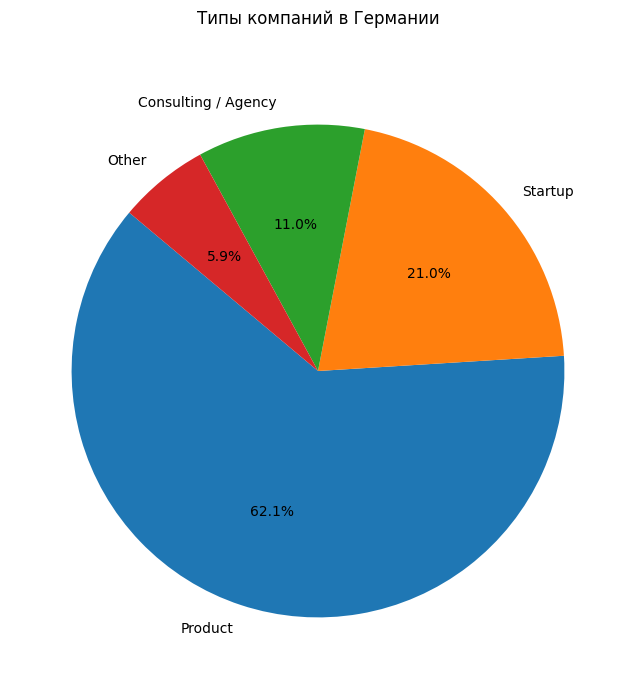

In [43]:
pie(df, 'company_type', 'Типы компаний в Германии')

В Германии весьма большой процент стартапов

<h1>Вывод на основе Исследования рынка труда Германии на 2020 год</h1>
<ol>
    <li>Большинство опрошенных получают вполне неплохую зарплату.</li>
    <li>Основное направление разработки в стране — Software.</li>
    <li>На рынке преобладают молодые специалисты.</li>
    <li>Самые популярные языки программирования: Python и Java.</li>
    <li>Среди представленных данных больше всего людей, достигших уровня Senior.</li>
</ol>